### Simple autoencoder for MNIST dim. reduction with Keras

#### Imports

In [55]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.datasets import mnist

#### Load MNIST data

In [64]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # note that we do not need the labels for our AE

# normalize dataset
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

# reshape from 28x28 to 784
x_train = x_train.reshape((len(x_train),28*28)) 
x_test = x_test.reshape((len(x_test), 28*28))

print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


#### Define network architecture

Input (784) --> Encoder --> Code (size tbd) --> Decoder --> Output (784)

In [148]:
input_img = Input(shape=(784,))
encoder = Dense(128, activation='relu')(input_img)
decoder = Dense(784, activation='sigmoid')(encoder)

autoencoder = Model(input_img, decoder)
encoder = Model(input_img, encoder)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

#### Train network

In [149]:
history_128 = autoencoder.fit(x_train, x_train, epochs=20, batch_size=64, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.2526 - val_loss: 0.1928
Epoch 2/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.1746 - val_loss: 0.1577
Epoch 3/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.1487 - val_loss: 0.1382
Epoch 4/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.1326 - val_loss: 0.1247
Epoch 5/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.1210 - val_loss: 0.1146
Epoch 6/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.1120 - val_loss: 0.1067
Epoch 7/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.1051 - val_loss: 0.1008
Epoch 8/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0999 - val_loss: 0.0963
Epoch 9/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0959 - val_loss: 0.

#### Test network

In [150]:
reconst_test = autoencoder.predict(x_test)
encode_test = encoder.predict(x_test)

#### Plot results

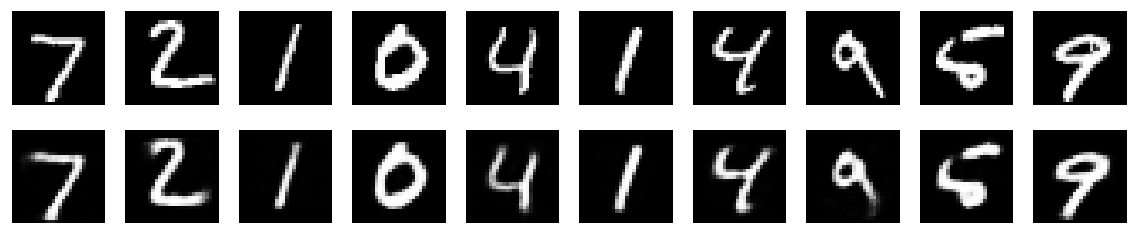

In [151]:
n=10
row=2

plt.figure(figsize=(20, 4))
for i in range(n):
    
# display original
    ax = plt.subplot(row, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# display reconstruction
    ax = plt.subplot(row, n, i + 1 + n)
    plt.imshow(reconst_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [152]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_34 (Dense)             (None, 784)               101136    
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________


In [153]:
print(history.history.keys())

['loss', 'val_loss']


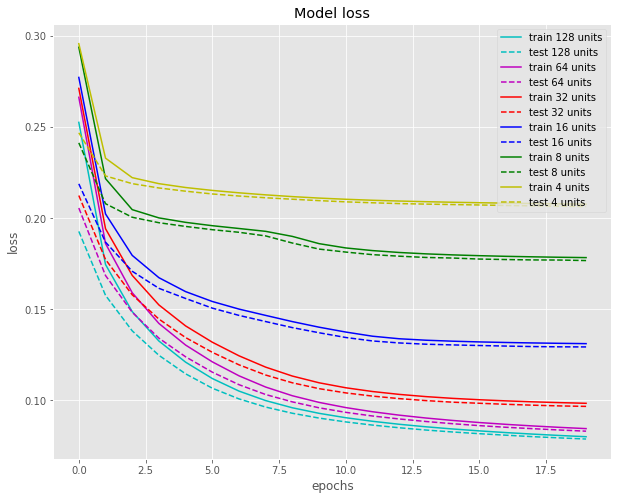

In [154]:
plt.figure(figsize=(10, 8))
plt.plot(history_128.history['loss'],'c')
plt.plot(history_128.history['val_loss'],'c--')
plt.plot(history_64.history['loss'],'m')
plt.plot(history_64.history['val_loss'],'m--')
plt.plot(history_32.history['loss'],'r')
plt.plot(history_32.history['val_loss'],'r--')
plt.plot(history_16.history['loss'],'b')
plt.plot(history_16.history['val_loss'],'b--')
plt.plot(history_08.history['loss'],'g')
plt.plot(history_08.history['val_loss'],'g--')
plt.plot(history_04.history['loss'],'y')
plt.plot(history_04.history['val_loss'],'y--')

plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train 128 units','test 128 units','train 64 units','test 64 units','train 32 units','test 32 units','train 16 units','test 16 units','train 8 units','test 8 units','train 4 units','test 4 units'])
plt.show()


Globally, we can see a tradeoff between performance and size. Using more units to encode the data leads to better performance, but also takes more space (more parameters, so we 'encode' less).

Using 4 or 8 units: learning almost stops after only 2 epochs, meaning the model has a hard time encoding the data in such a low number of hidden units.
Using 16 units: better learning.
Using 32 units: good tradeoff between having decent performance while still keeping the encoding size low.
Using 64 and 128 units: although it does improve performance a little bit,, it is not enough to make for the added computational size. After 20 epochs, the loss decreases only by 0.015 between 64 and 128 hidden units.

In [156]:
input_img = Input(shape=(784,))
encoder1 = Dense(32, activation='relu')(input_img)
encoder2 = Dense(16, activation='relu')(encoder1)
decoder1 = Dense(32, activation='relu')(encoder2)
decoder2 = Dense(784, activation='sigmoid')(decoder1)

autoencoder = Model(input_img, decoder2)
encoder = Model(input_img, encoder2)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [157]:
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=64, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2664 - val_loss: 0.2143
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.1934 - val_loss: 0.1773
Epoch 3/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.1722 - val_loss: 0.1652
Epoch 4/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1620 - val_loss: 0.1580
Epoch 5/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.1544 - val_loss: 0.1505
Epoch 6/20
60000/60000 [==============================] - 5s 92us/step - loss: 0.1491 - val_loss: 0.1462
Epoch 7/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.1442 - val_loss: 0.1404
Epoch 8/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.1403 - val_loss: 0.1373
Epoch 9/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.1382 - val_loss: 0.1362


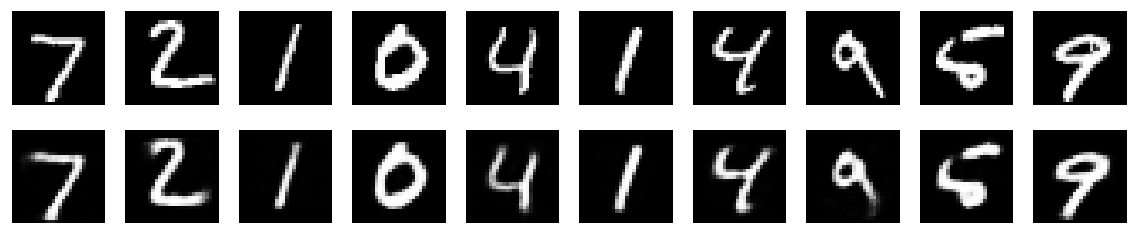

In [158]:
n=10
row=2

plt.figure(figsize=(20, 4))
for i in range(n):
    
# display original
    ax = plt.subplot(row, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# display reconstruction
    ax = plt.subplot(row, n, i + 1 + n)
    plt.imshow(reconst_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [159]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_40 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_41 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_42 (Dense)             (None, 784)               25872     
Total params: 52,064
Trainable params: 52,064
Non-trainable params: 0
_________________________________________________________________


In [160]:
input_img = Input(shape=(784,))
encoder1 = Dense(64, activation='relu')(input_img)
encoder2 = Dense(32, activation='relu')(encoder1)
decoder1 = Dense(64, activation='relu')(encoder2)
decoder2 = Dense(784, activation='sigmoid')(decoder1)

autoencoder = Model(input_img, decoder2)
encoder = Model(input_img, encoder2)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [161]:
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=64, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.2627 - val_loss: 0.2028
Epoch 2/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1835 - val_loss: 0.1688
Epoch 3/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1632 - val_loss: 0.1544
Epoch 4/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1496 - val_loss: 0.1415
Epoch 5/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1397 - val_loss: 0.1352
Epoch 6/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1331 - val_loss: 0.1285
Epoch 7/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1272 - val_loss: 0.1243
Epoch 8/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1226 - val_loss: 0.1190
Epoch 9/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1200 - val_loss: 0.1

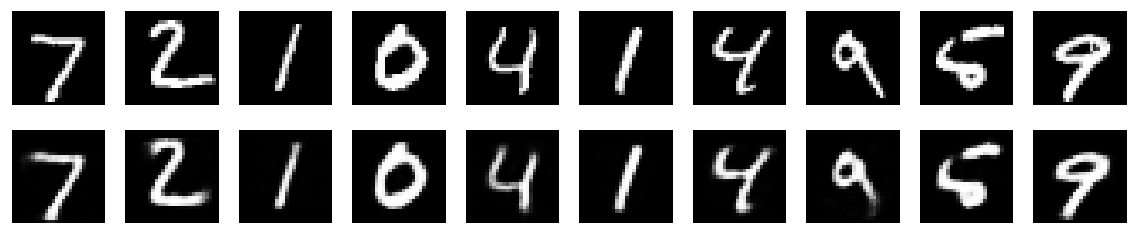

In [162]:
n=10
row=2

plt.figure(figsize=(20, 4))
for i in range(n):
    
# display original
    ax = plt.subplot(row, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# display reconstruction
    ax = plt.subplot(row, n, i + 1 + n)
    plt.imshow(reconst_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [163]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_44 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_45 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_46 (Dense)             (None, 784)               50960     
Total params: 105,392
Trainable params: 105,392
Non-trainable params: 0
_________________________________________________________________
